# Technical Test Pythae

To run this notebook you will need a Python version >=3.8

## Preliminaries: Setup environnement & Data

In [2]:
#%pip install pythae torchvision torch torchsummary matplotlib

In [20]:
import torch
from torch.utils.data import Dataset, ConcatDataset
from pythae.data.datasets import DatasetOutput


class MNIST(Dataset):
    def __init__(self, data):
        self.data = data.type(torch.float)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        return DatasetOutput(data=x)


In [4]:
from torchvision import datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [5]:
import random

def sample_indices(vector, k, seed=None):
    # # Example usage:
    # vector = torch.tensor([0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3])  # Example tensor with 4 labels
    # k = 3  # Number of points to sample from each label
    # seed = 42  # Seed for reproducibility
    # sampled_indices = sample_indices(vector, k, seed)
    # print("Sampled indices:", sampled_indices)

    if seed is not None:
        random.seed(seed)

    indices = []
    label_dict = {}

    # Group indices by label
    for i, label in enumerate(vector):
        label = label.item() if torch.is_tensor(label) else label
        if label not in label_dict:
            label_dict[label] = [i]
        else:
            label_dict[label].append(i)

    # Sample k points from each label
    for label, label_indices in label_dict.items():
        sampled_indices = random.sample(label_indices, min(k, len(label_indices)))
        indices.extend(sampled_indices)

    random.shuffle(indices)

    return indices

In [6]:
train_indeces = sample_indices(mnist_trainset.targets, k=20, seed=42)

remaining_indeces = list(set(range(len(mnist_trainset.targets)))-set(train_indeces))
test_indeces = sample_indices(mnist_trainset.targets[remaining_indeces], k=10, seed=42)

In [7]:
train_dataset = MNIST(mnist_trainset.data[train_indeces].reshape(-1, 1, 28, 28) / 255.)
eval_dataset = MNIST(mnist_trainset.data[test_indeces].reshape(-1, 1, 28, 28) / 255.)
print(train_dataset.data.shape, eval_dataset.data.shape)

torch.Size([200, 1, 28, 28]) torch.Size([100, 1, 28, 28])


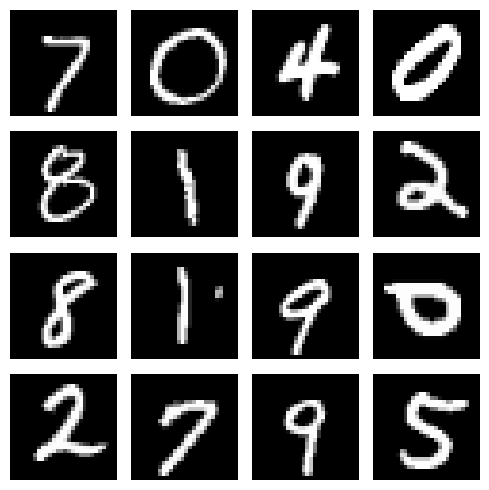

In [32]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_dataset[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

## Step 1: Training a VAE with Pythae

To train a VAE with Pythae, the first step is to define the configuration you want to apply to your
autoencoder model. This will be used to instantiate the VAE instance. Then, you will need to
setup the training configuration and launch a training.

**Objective: Complete the following code based so you can launch a training using Pythae's model.**

Required training setup:
- The model should have a latent dimension of 8
- Train the model for 50 epochs, a learning rate of 3e-3 and batch_size of 64
- Save the best model on validation set in a folder named `experiments`

In [9]:
from pythae.models import RHVAEConfig, RHVAE


model_config = RHVAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=8
)

model = RHVAE(
    model_config=model_config
)

In [30]:
from pythae.trainers import BaseTrainerConfig, BaseTrainer


training_config = BaseTrainerConfig(
    output_dir='experiments',
    num_epochs=50,
    learning_rate=3e-3,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
)

trainer = BaseTrainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    training_config=training_config
)

trainer.train()

Model passed sanity check !
Ready for training.

Created experiments/RHVAE_training_2024-04-08_16-24-15. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 50
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.003
    maximize: False
    weight_decay: 0
)
Scheduler: None

Successfully launched training !



Training of epoch 1/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 1/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.5099
Eval loss: 22.9832
--------------------------------------------------------------------------


Training of epoch 2/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 2/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2761
Eval loss: 20.6026
--------------------------------------------------------------------------


Training of epoch 3/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 3/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.4536
Eval loss: 22.2859
--------------------------------------------------------------------------


Training of epoch 4/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 4/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.6754
Eval loss: 20.5508
--------------------------------------------------------------------------


Training of epoch 5/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 5/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.6198
Eval loss: 20.8205
--------------------------------------------------------------------------


Training of epoch 6/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 6/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.7133
Eval loss: 21.9604
--------------------------------------------------------------------------


Training of epoch 7/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 7/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.756
Eval loss: 20.6856
--------------------------------------------------------------------------


Training of epoch 8/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 8/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.684
Eval loss: 20.6714
--------------------------------------------------------------------------


Training of epoch 9/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 9/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.3197
Eval loss: 21.4996
--------------------------------------------------------------------------


Training of epoch 10/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 10/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.7132
Eval loss: 21.8062
--------------------------------------------------------------------------


Training of epoch 11/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 11/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.9472
Eval loss: 21.054
--------------------------------------------------------------------------


Training of epoch 12/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 12/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.0832
Eval loss: 20.9677
--------------------------------------------------------------------------


Training of epoch 13/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 13/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.8195
Eval loss: 20.3805
--------------------------------------------------------------------------


Training of epoch 14/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 14/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.289
Eval loss: 21.2072
--------------------------------------------------------------------------


Training of epoch 15/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 15/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.8817
Eval loss: 20.5669
--------------------------------------------------------------------------


Training of epoch 16/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 16/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.9764
Eval loss: 20.6798
--------------------------------------------------------------------------


Training of epoch 17/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 17/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.8299
Eval loss: 21.45
--------------------------------------------------------------------------


Training of epoch 18/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 18/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.7479
Eval loss: 20.39
--------------------------------------------------------------------------


Training of epoch 19/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 19/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.9478
Eval loss: 21.5692
--------------------------------------------------------------------------


Training of epoch 20/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 20/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.0137
Eval loss: 21.0458
--------------------------------------------------------------------------


Training of epoch 21/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 21/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.4401
Eval loss: 21.1801
--------------------------------------------------------------------------


Training of epoch 22/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 22/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.4704
Eval loss: 20.7295
--------------------------------------------------------------------------


Training of epoch 23/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 23/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.7856
Eval loss: 20.0904
--------------------------------------------------------------------------


Training of epoch 24/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 24/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.1901
Eval loss: 21.2861
--------------------------------------------------------------------------


Training of epoch 25/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 25/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.5259
Eval loss: 21.3803
--------------------------------------------------------------------------


Training of epoch 26/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 26/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.3824
Eval loss: 21.079
--------------------------------------------------------------------------


Training of epoch 27/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 27/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.4913
Eval loss: 21.3101
--------------------------------------------------------------------------


Training of epoch 28/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 28/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.2108
Eval loss: 20.9308
--------------------------------------------------------------------------


Training of epoch 29/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 29/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.8823
Eval loss: 20.4139
--------------------------------------------------------------------------


Training of epoch 30/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 30/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.4535
Eval loss: 20.6546
--------------------------------------------------------------------------


Training of epoch 31/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 31/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.4721
Eval loss: 20.7028
--------------------------------------------------------------------------


Training of epoch 32/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 32/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.8442
Eval loss: 20.5514
--------------------------------------------------------------------------


Training of epoch 33/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 33/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.7515
Eval loss: 21.3832
--------------------------------------------------------------------------


Training of epoch 34/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 34/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.5489
Eval loss: 21.0553
--------------------------------------------------------------------------


Training of epoch 35/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 35/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.2164
Eval loss: 20.6448
--------------------------------------------------------------------------


Training of epoch 36/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 36/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.2883
Eval loss: 21.0647
--------------------------------------------------------------------------


Training of epoch 37/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 37/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.445
Eval loss: 20.8663
--------------------------------------------------------------------------


Training of epoch 38/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 38/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.1958
Eval loss: 20.9431
--------------------------------------------------------------------------


Training of epoch 39/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 39/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.3857
Eval loss: 20.5927
--------------------------------------------------------------------------


Training of epoch 40/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 40/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.1103
Eval loss: 20.3023
--------------------------------------------------------------------------


Training of epoch 41/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 41/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.2567
Eval loss: 21.4636
--------------------------------------------------------------------------


Training of epoch 42/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 42/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.852
Eval loss: 21.2396
--------------------------------------------------------------------------


Training of epoch 43/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 43/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.8663
Eval loss: 20.9213
--------------------------------------------------------------------------


Training of epoch 44/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 44/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.9334
Eval loss: 21.7205
--------------------------------------------------------------------------


Training of epoch 45/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 45/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.943
Eval loss: 21.2542
--------------------------------------------------------------------------


Training of epoch 46/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 46/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.753
Eval loss: 21.8832
--------------------------------------------------------------------------


Training of epoch 47/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 47/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.6805
Eval loss: 20.8585
--------------------------------------------------------------------------


Training of epoch 48/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 48/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.1024
Eval loss: 20.5179
--------------------------------------------------------------------------


Training of epoch 49/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 49/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.0603
Eval loss: 20.487
--------------------------------------------------------------------------


Training of epoch 50/50:   0%|          | 0/4 [00:00<?, ?batch/s]

Eval of epoch 50/50:   0%|          | 0/2 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.1216
Eval loss: 20.9593
--------------------------------------------------------------------------
Training ended!
Saved final model in experiments/RHVAE_training_2024-04-08_16-24-15/final_model


## Step 2: Generating synthetic images with PythAE

In [11]:
from pythae.models import AutoModel

import glob

# trained_model = AutoModel.load_from_folder(
#     glob.glob('experiments/*/final_model')[0]
# )

trained_model = model

### Normal Sampler

In [12]:
from pythae.samplers import NormalSampler


sampler = NormalSampler(
    model=trained_model,
    sampler_config=None
)
gen_data = sampler.sample(
    num_samples=16,
)

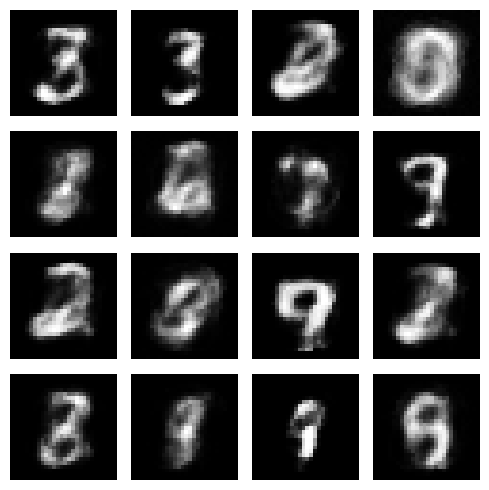

In [13]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(gen_data[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

### Gaussian Mixture Model Sampler

In [14]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig


gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

gmm_sampler.fit(
    train_data=train_dataset.data
)

gmm_gen_data = gmm_sampler.sample(
   num_samples=16
)

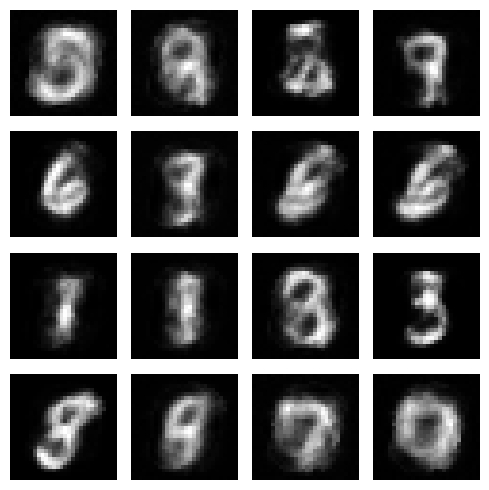

In [15]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(gmm_gen_data[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

### RHVAE Sampler

In [16]:
from pythae.samplers import RHVAESampler, RHVAESamplerConfig


rh_sampler_config = RHVAESamplerConfig(
)

rh_sampler = RHVAESampler(
    sampler_config=None,
    model=trained_model
)

rh_sampler.fit(
    train_data=train_dataset.data
)

rh_gen_data = rh_sampler.sample(
   num_samples=16
)

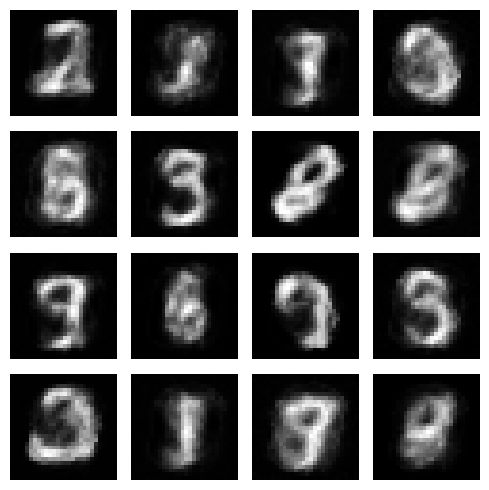

In [17]:
import matplotlib.pyplot as plt


_, ax = plt.subplots(nrows=4, ncols=4, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(rh_gen_data[i*4+j].data.movedim(0, 2), cmap='gray')
        ax[i][j].axis('off')
plt.tight_layout()

In [19]:
rh_gen_data.shape

torch.Size([16, 1, 28, 28])

In [21]:
combined_dataset = ConcatDataset([train_dataset, MNIST(rh_gen_data)])


In [29]:
train_dataset.data.shape, rh_gen_data.shape

(torch.Size([200, 1, 28, 28]), torch.Size([16, 1, 28, 28]))